In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler , Normalizer
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('gld_price_data.csv',parse_dates=["Date"])

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,2018-05-08,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2018-05-16,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0    2008-01-02  1447.160034   84.860001  78.470001  15.1800  1.471692
1    2008-01-03  1447.160034   85.570000  78.370003  15.2850  1.474491
2    2008-01-04  1411.630005   85.129997  77.309998  15.1670  1.475492
3    2008-01-07  1416.180054   84.769997  75.500000  15.0530  1.468299
4    2008-01-08  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285 2018-05-08  2671.919922  124.589996  14.060000  15.5100  1.186789
2286 2018-05-09  2697.790039  124.330002  14.370000  15.5300  1.184722
2287 2018-05-10  2723.070068  125.180000  14.410000  15.7400  1.191753
2288 2018-05-14  2730.129883  124.489998  14.380000  15.5600  1.193118
2289 2018-05-16  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [6]:
df.shape

(2290, 6)

In [7]:
df.drop_duplicates(inplace=True)                                       
# Let's remove duplicates, how many rows now?
df.shape

(2290, 6)

In [8]:
# checking the number of missing value
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data
df.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


<h3>Boxplots are very useful in plotting the spread and skewness of the data, it is also useful in plotting the individual’s outlier data points, they consist of the box which represents points in the range of 25% to 75% quantiles. While the line in the middle of the box represents the median and the whisker at the end of the box shows the range of below 25 % and 75% excluding outliers. </h3>

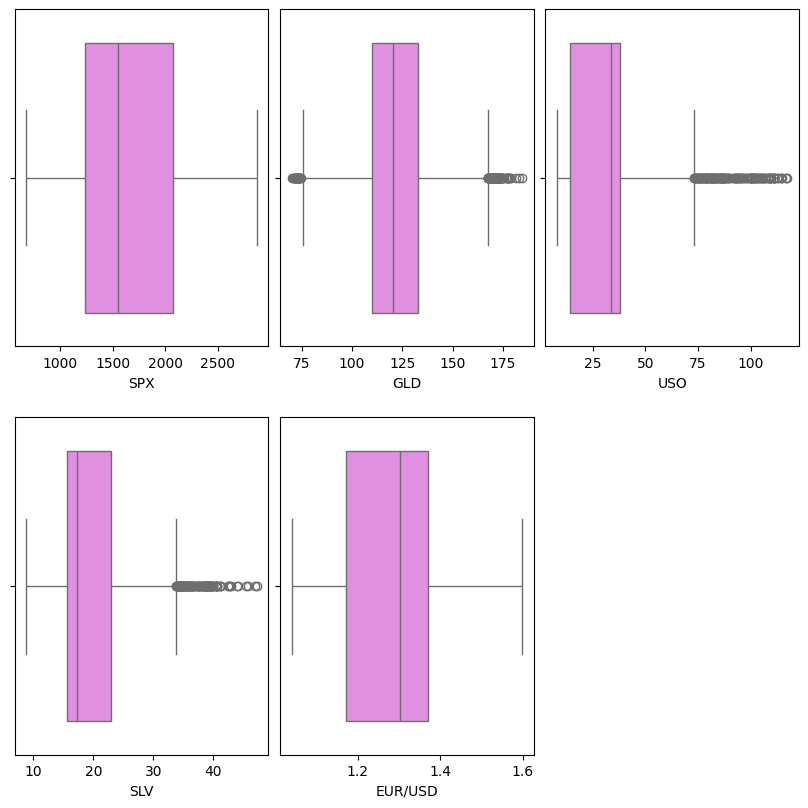

In [10]:
fig = plt.figure(figsize=(8, 8))
temp = df.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=item, color='violet')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

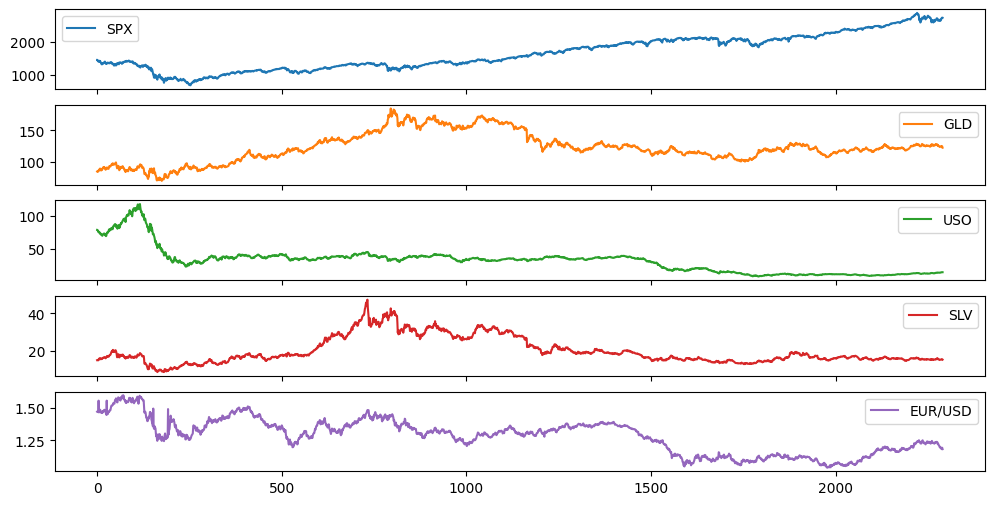

In [11]:
d=df.drop(['Date'],axis=1)
d.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

<h1>Data Correlation</h1>

<Axes: >

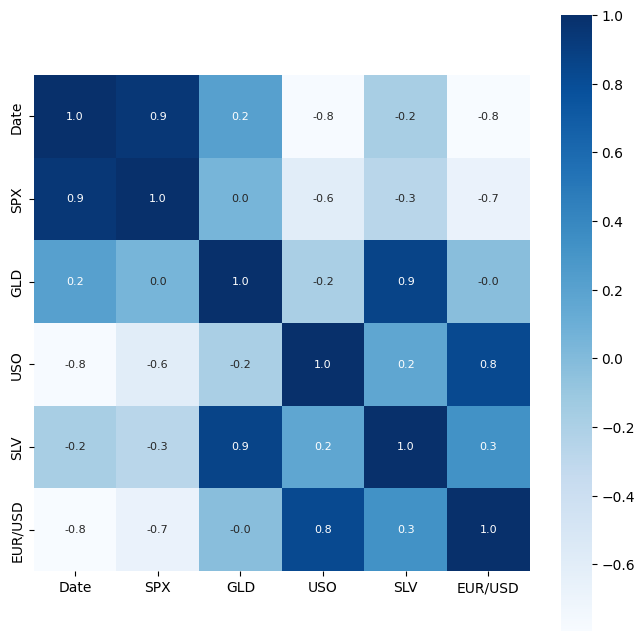

In [12]:
corr = df.corr()
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
#Lets look the correlation score
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
Date       0.209118
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



C:\Users\USER\AppData\Local\Temp\ipykernel_12828\1044759861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='yellow')


<Axes: xlabel='GLD', ylabel='Density'>

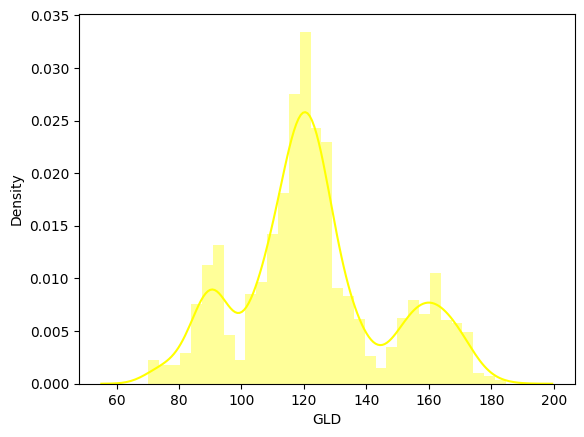

In [14]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='yellow')

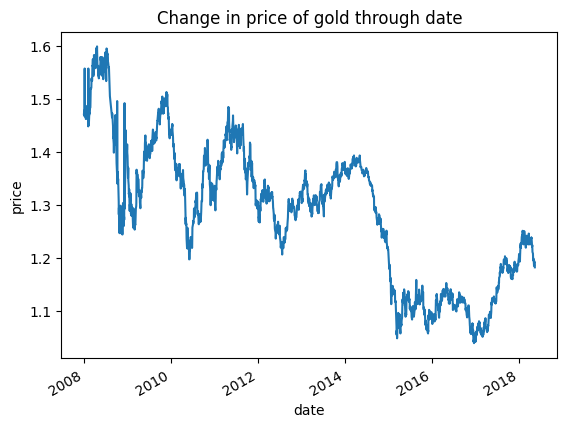

In [15]:
# reset the index to date column
df.set_index("Date", inplace=True)
# plot price of gold for each increasing day
df["EUR/USD"].plot()
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

In [16]:
X = df.drop(['GLD'],axis=1)
Y = df['GLD']

In [17]:
print(X)

                    SPX        USO      SLV   EUR/USD
Date                                                 
2008-01-02  1447.160034  78.470001  15.1800  1.471692
2008-01-03  1447.160034  78.370003  15.2850  1.474491
2008-01-04  1411.630005  77.309998  15.1670  1.475492
2008-01-07  1416.180054  75.500000  15.0530  1.468299
2008-01-08  1390.189941  76.059998  15.5900  1.557099
...                 ...        ...      ...       ...
2018-05-08  2671.919922  14.060000  15.5100  1.186789
2018-05-09  2697.790039  14.370000  15.5300  1.184722
2018-05-10  2723.070068  14.410000  15.7400  1.191753
2018-05-14  2730.129883  14.380000  15.5600  1.193118
2018-05-16  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

Date
2008-01-02     84.860001
2008-01-03     85.570000
2008-01-04     85.129997
2008-01-07     84.769997
2008-01-08     86.779999
                 ...    
2018-05-08    124.589996
2018-05-09    124.330002
2018-05-10    125.180000
2018-05-14    124.489998
2018-05-16    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

<h1>Train and Test the models</h1>

<h2>Linear Regression</h2>

In [20]:
LR = LinearRegression()
# training the model
LR.fit(X_train,Y_train)
# prediction on Test Data
LR_prediction = LR.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, LR_prediction)
print("R squared error using Linear Regression:{}%".format(round(score*100,2)))

R squared error using Linear Regression:86.58%


In [21]:
Y_test = list(Y_test)

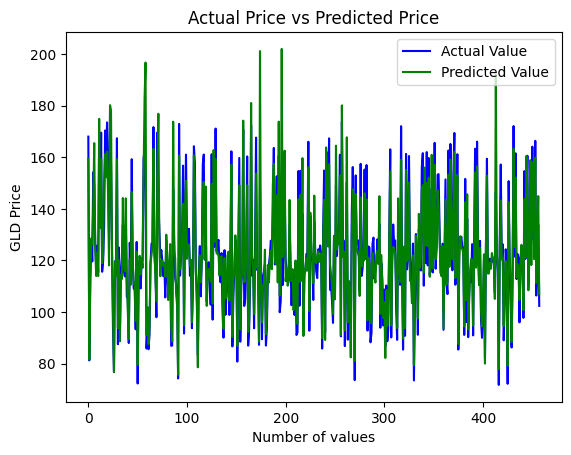

In [22]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(LR_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

<h2>Random Forest Regressor</h2>

In [23]:
RF = RandomForestRegressor(n_estimators=100)# training the model
RF.fit(X_train,Y_train)
# prediction on Test Data
RF_prediction = RF.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, RF_prediction)
print("R squared error using Random Forest Regressor: {}%".format(round(score*100,2)))

R squared error using Random Forest Regressor: 98.93%


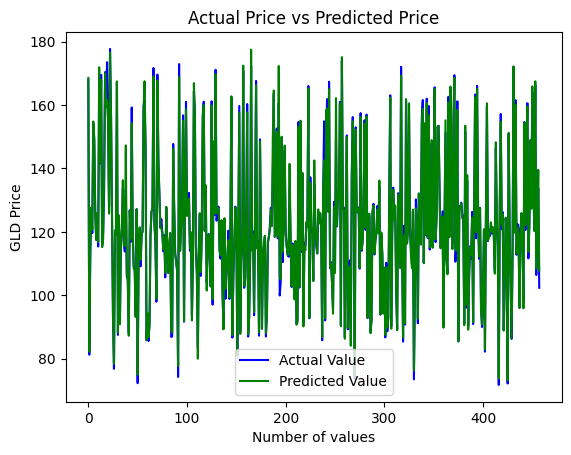

In [24]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(RF_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

<h2>KNeighborsRegressor</h2>

In [25]:
# Initialize the K-Nearest Neighbors Regressor model
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train,Y_train)
# prediction on Test Data
KNN_prediction = KNN.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, KNN_prediction)
print("R squared error using Knn Regressor: {}%".format(round(score*100,2)))

R squared error using Knn Regressor: 93.39%


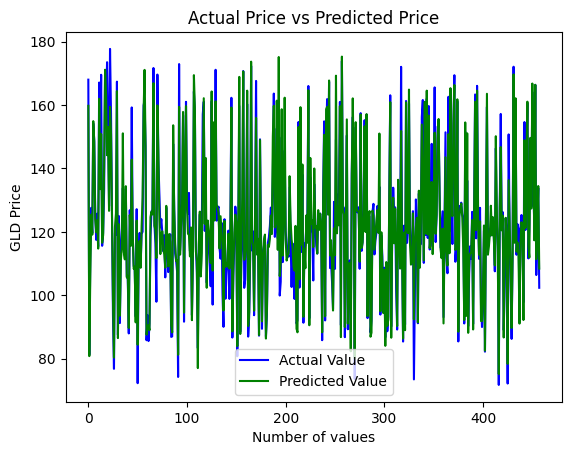

In [26]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(KNN_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

<h2>Decision Tree Regressor</h2>

In [27]:
DR= DecisionTreeRegressor(criterion='squared_error')
DR.fit(X_train,Y_train)
# prediction on Test Data
DR_prediction = DR.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, DR_prediction)
print("R squared error using Decision Tree Regressor: {}%".format(round(score*100,2)))

R squared error using Decision Tree Regressor: 98.4%


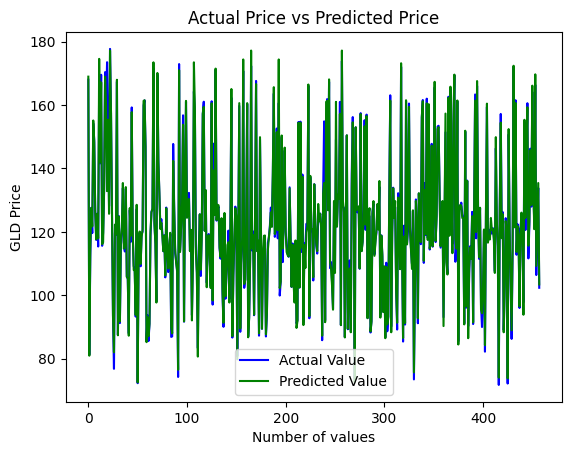

In [28]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(DR_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

<h1>use min max scaler</h1>

In [29]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [30]:
LR2 = LinearRegression()
# training the model
LR2.fit(X_train,Y_train)
# prediction on Test Data
LR2_prediction = LR2.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, LR2_prediction)
print("R squared error using Linear Regression:{}%".format(round(score*100,2)))

R squared error using Linear Regression:89.76%


In [31]:
DR2= DecisionTreeRegressor(criterion='squared_error')
DR2.fit(X_train,Y_train)
# prediction on Test Data
DR2_prediction = DR2.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, DR2_prediction)
print("R squared error using Decision Tree Regressor: {}%".format(round(score*100,2)))

R squared error using Decision Tree Regressor: 98.61%


In [32]:
# Initialize the K-Nearest Neighbors Regressor model
KNN2 = KNeighborsRegressor(n_neighbors=5)
KNN2.fit(X_train,Y_train)
# prediction on Test Data
KNN2_prediction = KNN2.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, KNN2_prediction)
print("R squared error using Knn Regressor: {}%".format(round(score*100,2)))

R squared error using Knn Regressor: 99.23%


In [33]:
RF2 = RandomForestRegressor(n_estimators=100)# training the model
RF2.fit(X_train,Y_train)
# prediction on Test Data
RF2_prediction = RF2.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, RF2_prediction)
print("R squared error using Random Forest Regressor: {}%".format(round(score*100,2)))

R squared error using Random Forest Regressor: 99.07%


<h1>Using only Normalization</h1>

In [34]:
# Create the Normalizer
normalizer = Normalizer(norm='l2')  # 'l2' is the default and corresponds to the Euclidean norm

# Transform the data
X_normalized = normalizer.transform(X)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

In [36]:
LR4 = LinearRegression()
# training the model
LR4.fit(X_train,Y_train)
# prediction on Test Data
LR4_prediction = LR4.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, LR4_prediction)
print("R squared error using Linear Regression:{}%".format(round(score*100,2)))

R squared error using Linear Regression:89.78%


In [37]:
DR4= DecisionTreeRegressor(criterion='squared_error')
DR4.fit(X_train,Y_train)
# prediction on Test Data
DR4_prediction = DR4.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, DR4_prediction)
print("R squared error using Decision Tree Regressor: {}%".format(round(score*100,2)))

R squared error using Decision Tree Regressor: 96.95%


In [38]:
# Initialize the K-Nearest Neighbors Regressor model
KNN4 = KNeighborsRegressor(n_neighbors=5)
KNN4.fit(X_train,Y_train)
# prediction on Test Data
KNN4_prediction = KNN4.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, KNN4_prediction)
print("R squared error using Knn Regressor: {}%".format(round(score*100,2)))

R squared error using Knn Regressor: 94.89%


In [39]:
RF4 = RandomForestRegressor(n_estimators=100)# training the model
RF4.fit(X_train,Y_train)
# prediction on Test Data
RF4_prediction = RF4.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, RF4_prediction)
print("R squared error using Random Forest Regressor: {}%".format(round(score*100,2)))

R squared error using Random Forest Regressor: 98.12%


<h1>After Normalization and MinMaxScaler</h1>

In [40]:
# Create the Normalizer
normalizer = Normalizer(norm='l2')  # 'l2' is the default and corresponds to the Euclidean norm

# Transform the data
X_normalized = normalizer.transform(X_scaled)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

In [42]:
LR3 = LinearRegression()
# training the model
LR3.fit(X_train,Y_train)
# prediction on Test Data
LR3_prediction = LR3.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, LR3_prediction)
print("R squared error using Linear Regression:{}%".format(round(score*100,2)))

R squared error using Linear Regression:92.31%


In [43]:
DR3= DecisionTreeRegressor(criterion='squared_error')
DR3.fit(X_train,Y_train)
# prediction on Test Data
DR3_prediction = DR3.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, DR3_prediction)
print("R squared error using Decision Tree Regressor: {}%".format(round(score*100,2)))

R squared error using Decision Tree Regressor: 95.78%


In [44]:
# Initialize the K-Nearest Neighbors Regressor model
KNN3 = KNeighborsRegressor(n_neighbors=5)
KNN3.fit(X_train,Y_train)
# prediction on Test Data
KNN3_prediction = KNN3.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, KNN3_prediction)
print("R squared error using Knn Regressor: {}%".format(round(score*100,2)))

R squared error using Knn Regressor: 97.99%


In [45]:
RF3 = RandomForestRegressor(n_estimators=100)# training the model
RF3.fit(X_train,Y_train)
# prediction on Test Data
RF3_prediction = RF3.predict(X_test)
# R squared error
score = metrics.r2_score(Y_test, RF3_prediction)
print("R squared error using Random Forest Regressor: {}%".format(round(score*100,2)))

R squared error using Random Forest Regressor: 98.2%
